# UFC Classification Project by Luigi Fiori



For this project, we will be dealing with a classification problem. 

![https://raw.githubusercontent.com/illumi91/dsc-mod-4-project-online-ds-pt-051319/master/zillow%20project/246x0w.jpg](https://raw.githubusercontent.com/illumi91/dsc-mod-4-project-online-ds-pt-051319/master/zillow%20project/246x0w.jpg)

I will be acting as a consultant for a bet site firm.

Our goal is to create a Machine Learning Model such that we can get some valuable predictions for our company.
In particular we will be working with UFC containing information about fights from 1993 up till today.

The Database can be found in Keggle and I leave a link here.

We'll be following the OSEMN methodology:

1.Obtain

2.Scrub

3.Explore

4.Model

5.Interpret

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  

# Load the Data

In [2]:
df = pd.read_csv('data_93.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [3]:
list(df.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_av

Let's check the labels present in the 'Winner' column.

In [4]:
df['Winner'].value_counts(normalize=True)

Red     0.674572
Blue    0.309292
Draw    0.016135
Name: Winner, dtype: float64

Next step is to remove the 'Draw' label being  representative of less than 2% of the overall data.

In [5]:
df = df[df['Winner'] != 'Draw']
df['Winner'].value_counts()

Red     3470
Blue    1591
Name: Winner, dtype: int64

In [6]:
#for x in df_2003.columns:
 #   if 'Round1' in x:
  #      df_2003.dropna(subset=[x], inplace=True)

# EDA

We are going to check the Nan values and deal with them based on the information we have.

In [7]:
df.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           22
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1241
B_avg_BODY_landed               1241
B_avg_CLINCH_att                1241
B_avg_CLINCH_landed             1241
B_avg_DISTANCE_att              1241
B_avg_DISTANCE_landed           1241
B_avg_GROUND_att                1241
B_avg_GROUND_landed             1241
B_avg_HEAD_att                  1241
B_avg_HEAD_landed               1241
B_avg_KD                        1241
B_avg_LEG_att                   1241
B_avg_LEG_landed                1241
B_avg_PASS                      1241
B_avg_REV                       1241
B

As we can see we miss some data.

Most of them are on fighters more outdated.

In this case unfortunately we have to drop the relative rows because we are not able to get back those information.

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

R_fighter                       0
B_fighter                       0
Referee                         0
date                            0
location                        0
Winner                          0
title_bout                      0
weight_class                    0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_avg_BODY_att                  0
B_avg_BODY_landed               0
B_avg_CLINCH_att                0
B_avg_CLINCH_landed             0
B_avg_DISTANCE_att              0
B_avg_DISTANCE_landed           0
B_avg_GROUND_att                0
B_avg_GROUND_landed             0
B_avg_HEAD_att                  0
B_avg_HEAD_landed               0
B_avg_KD                        0
B_avg_LEG_att                   0
B_avg_LEG_landed                0
B_avg_PASS                      0
B_avg_REV                       0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_SIG_STR_

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 0 to 5008
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 3.5+ MB


# Features importance through Random Forest

At this point I want to be able to check between all the features that I have those features more important in terms of impact.

To do so I'm going to create a Random Forest Model so that I can first look at the most important features in order to have a starting point for my model.

In [10]:
df.head(3)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0


In [11]:
X = df.drop('Winner', axis=1)
y = df['Winner']

In [12]:
X = X.select_dtypes(exclude=['object'])
list(X.dtypes)

[dtype('bool'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


After fitting our model we are going to create a dictionary to hold our sorted features so that we can have a better understanding on the features importance.

In [16]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False,inplace=True)
importances.head(30)
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize=(12,8))

,Gini-importance
R_avg_opp_BODY_att,0.018337
B_avg_opp_TOTAL_STR_landed,0.017763
R_age,0.014946
B_avg_DISTANCE_att,0.014447
R_avg_TOTAL_STR_landed,0.014374
B_avg_opp_HEAD_landed,0.014237
B_avg_TOTAL_STR_att,0.013664
R_avg_opp_HEAD_landed,0.013014
R_avg_opp_DISTANCE_landed,0.012500
B_avg_opp_GROUND_landed,0.012397


Here on top we can see our 30 best features for our model.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 0 to 5008
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 3.5+ MB


## Subtract Blue fighters columns to Red fighter columns for different features.

My intention through this process is to possibly find some new more important and valuable features for the model that we'll build later on.

In [18]:
df['WEIGHT_DIFF'] = df['R_Weight_lbs'] \
                        - df['B_Weight_lbs']

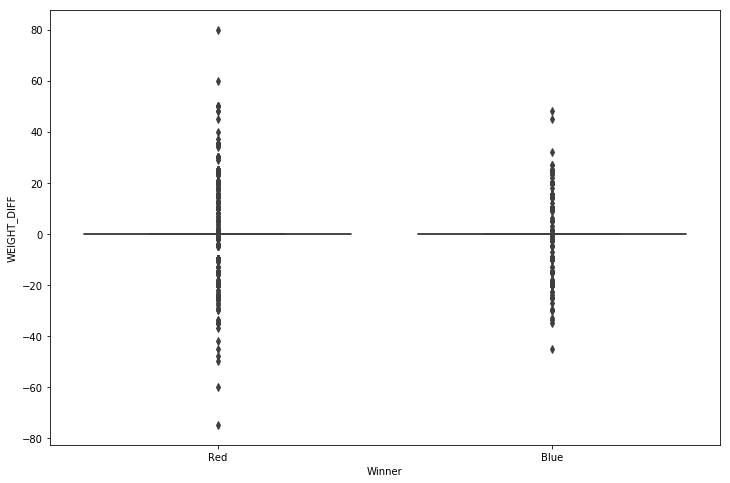

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'WEIGHT_DIFF', data=df)

Let's remove the outlier.

In [21]:
df = df[df['WEIGHT_DIFF'] < 75]

In [71]:
def boxplot_and_histogram(feature):
    plt.figure(figsize=(12,8))
    sns.boxplot(x='Winner', y= 'feature', data=df)
    plt.figure(figsize=(12,8))
    df['feature'].hist()
    plt.xlabel('feature', fontsize=20)
    plt.ylabel('FREQUENCY', fontsize=20)
    plt.title('feature''/FREQUENCY', fontsize=24);

In [72]:
boxplot_and_histogram('REACH_DIFF')

ValueError: Could not interpret input 'feature'

<Figure size 864x576 with 0 Axes>

In [23]:
df['REACH_DIFF'] = df['R_Reach_cms'] \
                        - df['B_Reach_cms']

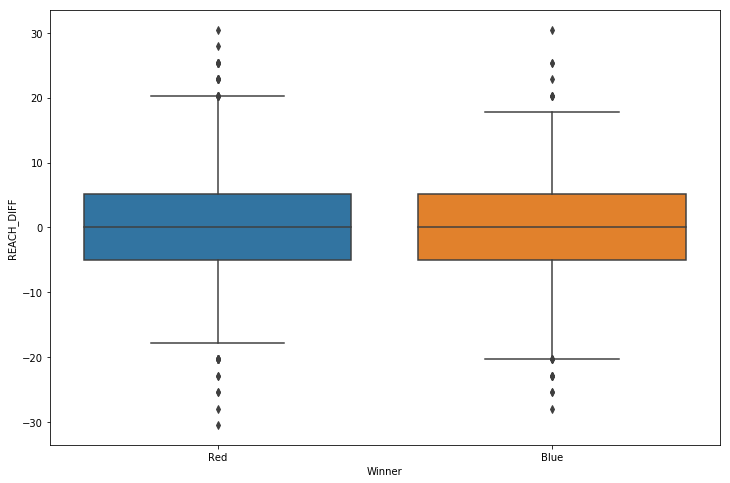

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'REACH_DIFF', data=df);

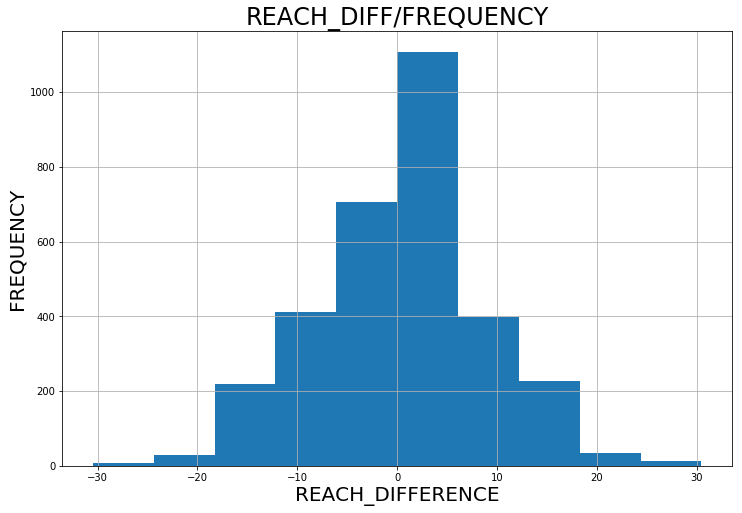

In [63]:
plt.figure(figsize=(12,8))
df['REACH_DIFF'].hist()
plt.xlabel('REACH_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('REACH_DIFF/FREQUENCY', fontsize=24);

In [25]:
df['HEIGHT_DIFF'] = df['R_Height_cms'] \
                        - df['B_Height_cms']

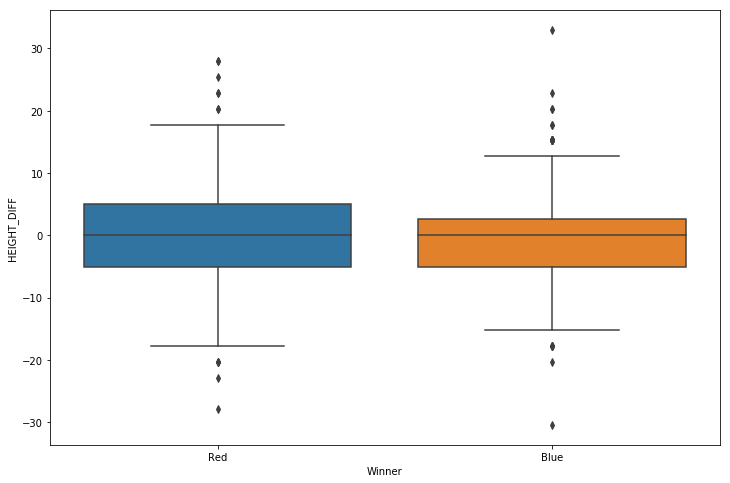

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEIGHT_DIFF', data=df);

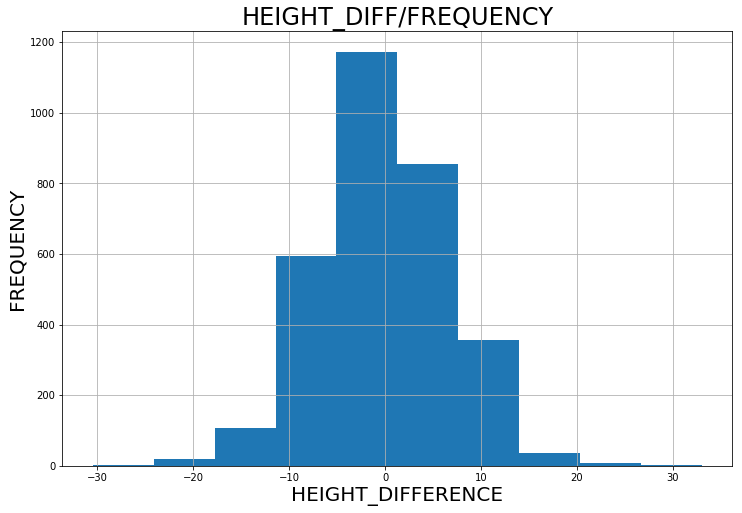

In [64]:
plt.figure(figsize=(12,8))
df['HEIGHT_DIFF'].hist()
plt.xlabel('HEIGHT_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEIGHT_DIFF/FREQUENCY', fontsize=24);

In [27]:
df['AGE_DIFF'] = df['R_age'] \
                        - df['B_age']

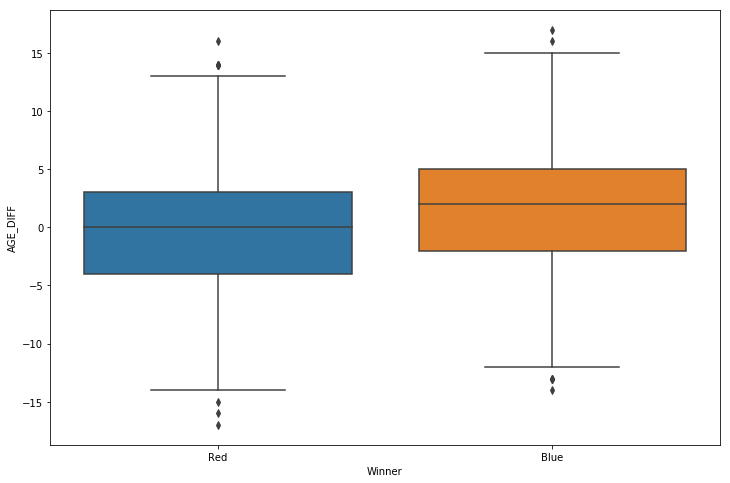

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'AGE_DIFF', data=df);

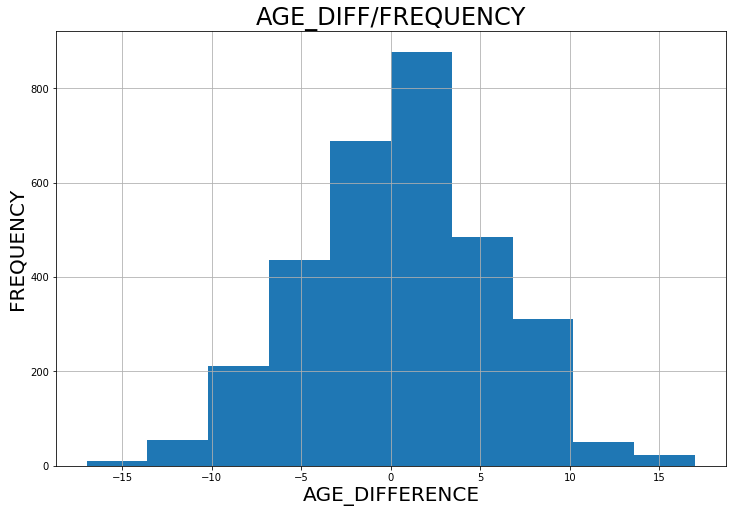

In [66]:
plt.figure(figsize=(12,8))
df['AGE_DIFF'].hist()
plt.xlabel('AGE_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('AGE_DIFF/FREQUENCY', fontsize=24);

In [29]:
df['TOT_STR_DIFF'] = df['R_avg_opp_TOTAL_STR_landed'] \
                        - df['B_avg_opp_TOTAL_STR_landed']

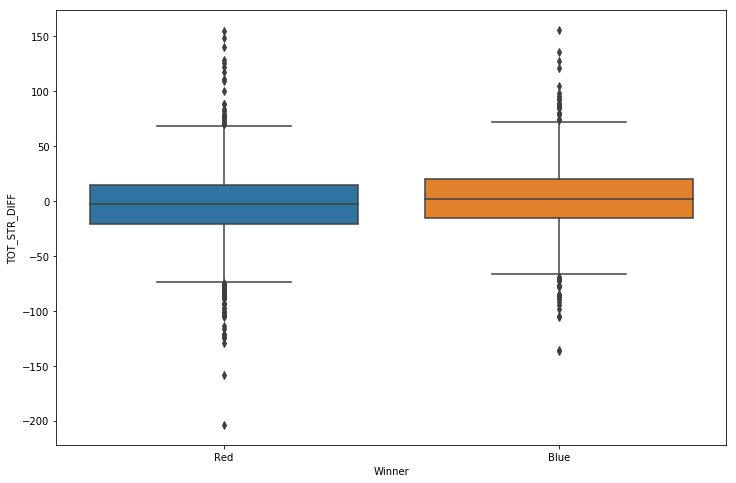

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_STR_DIFF', data=df);

In [ ]:
plt.figure(figsize=(12,8))
df['HEIGHT_DIFF'].hist()
plt.xlabel('HEIGHT_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEIGHT_DIFF/FREQUENCY', fontsize=24)

In [31]:
df['BODY_STR_DIFF'] = df['R_avg_opp_BODY_landed'] \
                        - df['B_avg_opp_BODY_landed']

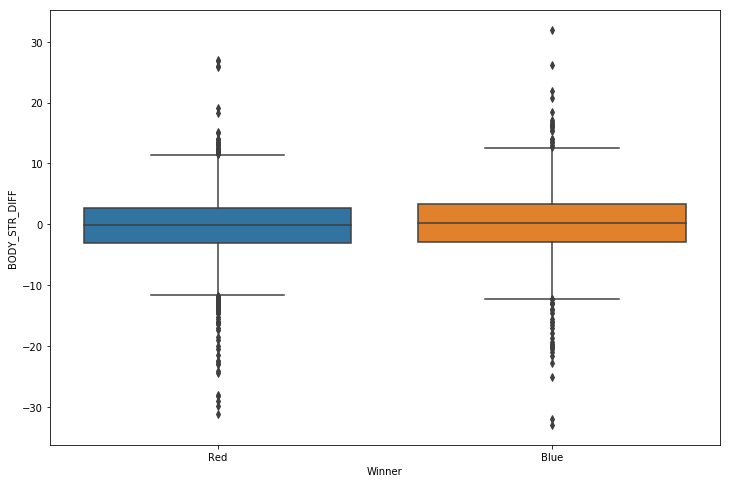

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'BODY_STR_DIFF', data=df);

In [33]:
df['HEAD_STR_DIFF'] = df['R_avg_opp_HEAD_landed'] \
                        - df['B_avg_opp_HEAD_landed']

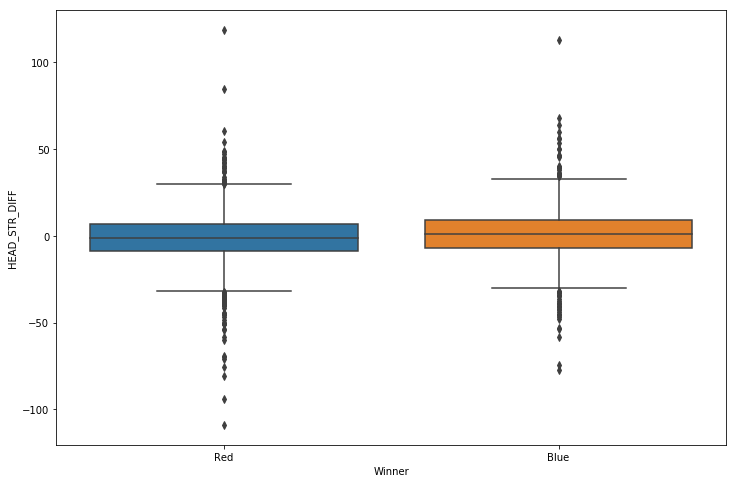

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEAD_STR_DIFF', data=df);

In [35]:
df['GROUND_STR_DIFF'] = df['R_avg_opp_GROUND_landed'] \
                        - df['B_avg_opp_GROUND_landed']

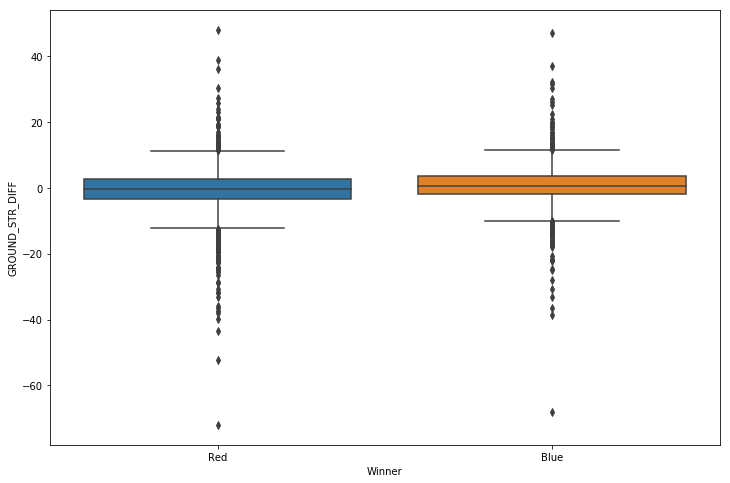

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'GROUND_STR_DIFF', data=df);

In [37]:
df['SIG_STR_DIFF'] = df['R_avg_SIG_STR_landed'] \
                        - df['B_avg_SIG_STR_landed']

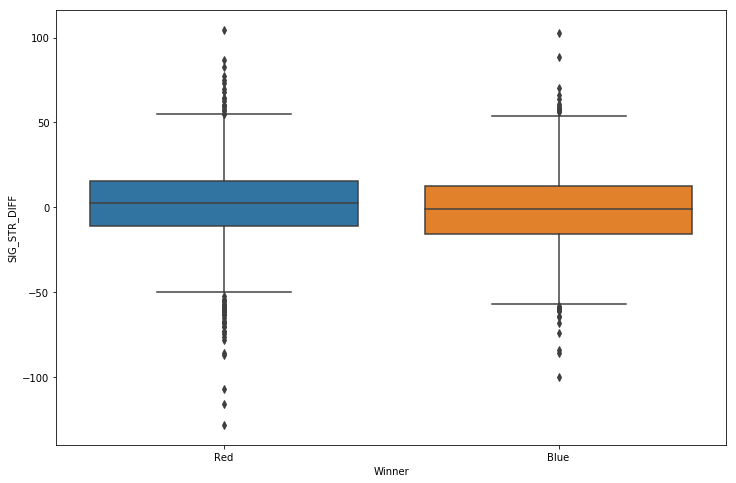

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SIG_STR_DIFF', data=df);

In [39]:
df['EXPERIENCE'] = df['R_total_time_fought(seconds)'] \
                        - df['B_total_time_fought(seconds)']

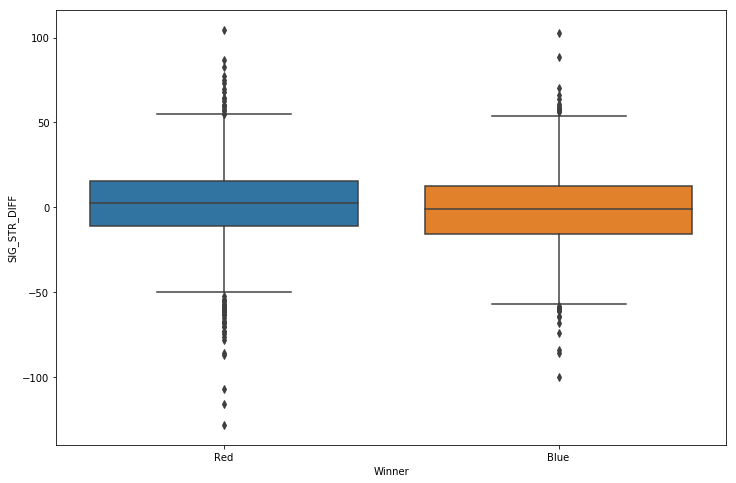

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SIG_STR_DIFF', data=df);

At this point I'm going to check again Random Forest for features importance includind this time our new columns.

In [41]:
X = df.drop('Winner', axis=1)
y = df['Winner']

In [42]:
X = X.select_dtypes(exclude=['object'])
list(X.dtypes)

[dtype('bool'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False,inplace=True)
importances.head(30)
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize=(12,8))

,Gini-importance
AGE_DIFF,0.016754
TOT_STR_DIFF,0.016079
GROUND_STR_DIFF,0.014621
B_avg_HEAD_att,0.014103
B_avg_SIG_STR_landed,0.013956
R_avg_opp_DISTANCE_landed,0.013810
R_avg_opp_GROUND_att,0.012928
R_avg_opp_TOTAL_STR_landed,0.012186
R_avg_opp_BODY_landed,0.012112
R_avg_DISTANCE_landed,0.011948


As we can see 3 of the new features are in the top3 for our new Model.

It's time now to start building a new model adding new features for a new model and evaluating its goodness. 

# using only age as variable

In [74]:
df_age = df[['AGE_DIFF','TOT_STR_DIFF', 'GROUND_STR_DIFF', 'Winner']]
df_age.head()

,AGE_DIFF,TOT_STR_DIFF,GROUND_STR_DIFF,Winner
0,1.0,24.100000,0.100000,Red
1,-1.0,6.885714,-2.614286,Red
2,-1.0,-11.174194,1.864516,Red
3,3.0,14.625000,-0.500000,Blue
4,-6.0,-62.250000,2.750000,Blue


In [75]:
X = df_age.drop('Winner', axis=1)
y = df_age['Winner']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [77]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
clf.classes_

array(['Blue', 'Red'], dtype=object)

In [79]:
clf.score(X_test, y_test)

0.6472081218274112

In [80]:
clf.score(X_train, y_train)

0.6474820143884892

In [82]:
for x, y in zip(clf.coef_[0], ['AGE_DIFF','TOT_STR_DIFF', 'GROUND_STR_DIFF']):
    print(f'{y} {x}')

AGE_DIFF -0.07570977532498109
TOT_STR_DIFF -0.0029633986317453734
GROUND_STR_DIFF -0.023173012996934673


In [49]:
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

In [50]:
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [51]:
y.value_counts()

Red     2016
Blue    1135
Name: Winner, dtype: int64

Accuracy is :64.34010152284264

Confusion Matrix
----------------
Predicted  Blue  Red  All
True                     
Blue         46  246  292
Red          35  461  496
All          81  707  788


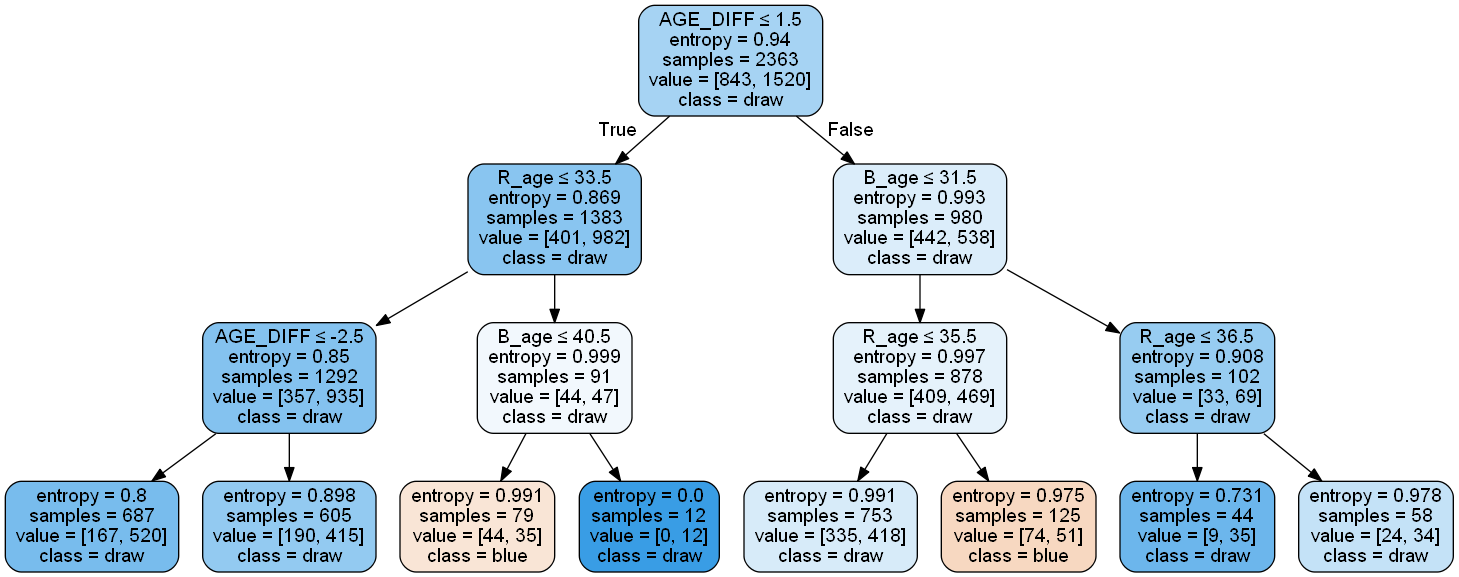

In [52]:
# Train a DT classifier
clf_dec_tree = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=3)  
clf_dec_tree.fit(X_train, y_train)  
# Make predictions for test data
y_pred = clf_dec_tree.predict(X_test) 
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Visualize the tree trained from complete dataset (optional)

dot_data = StringIO()
export_graphviz(clf_dec_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True, 
                feature_names=X.columns, class_names= ['blue', 'draw', 'no contest', 'red']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


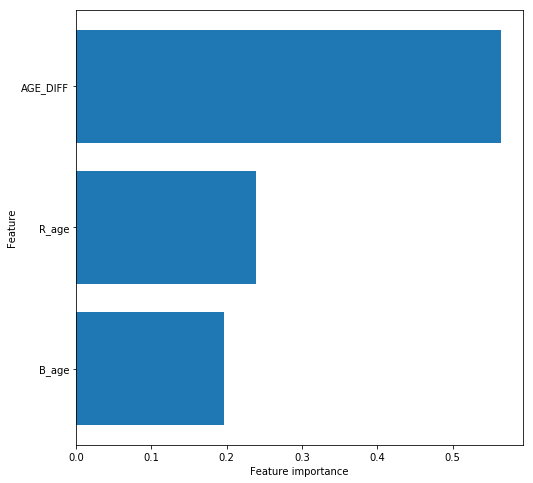

<Figure size 864x576 with 0 Axes>

In [53]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.figure(figsize=(12,8))

plot_feature_importances(clf_dec_tree)

In [51]:
new_df_1 = new_df.copy()

In [52]:
new_df_1['age difference'] = new_df_1['R_Age'] - new_df_1['B_Age']
new_df_1.head(3)

,B_Age,R_Age,B_Height,R_Height,winner,age difference
0,38.0,39.0,193.0,190.0,blue,1.0
1,36.0,32.0,172.0,170.0,red,-4.0
2,39.0,31.0,167.0,167.0,red,-8.0


In [53]:
X = new_df.drop('winner', axis=1)
y = new_df['winner']

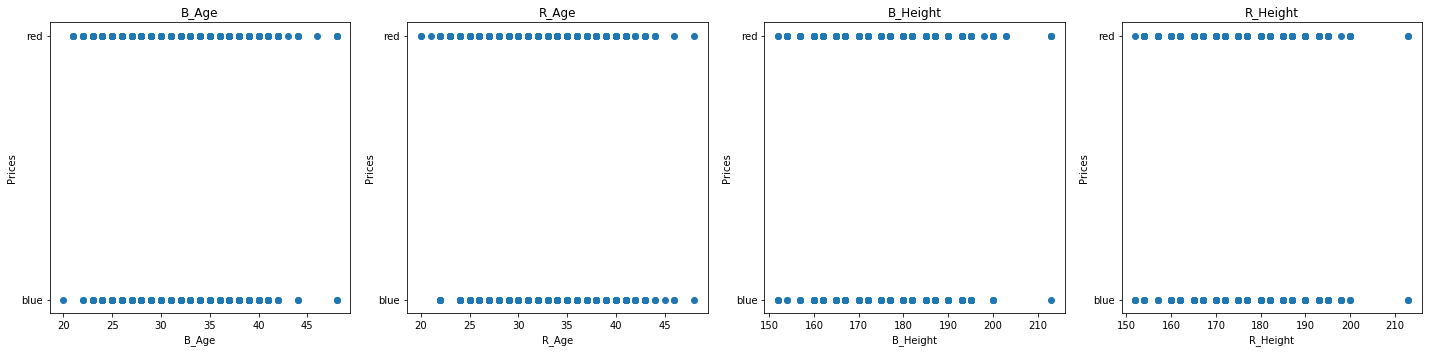

In [54]:
# Create scatter plots for each feature vs. target
plt.figure(figsize=(20, 5))
for i, col in enumerate(X.columns):
    plt.subplot(1, 4, i+1)
    plt.plot(new_df[col], y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')
    plt.tight_layout()

In [55]:
new_df['winner'].value_counts()

red     1327
blue     951
Name: winner, dtype: int64

In [56]:
df_no_cont = new_df[(new_df['winner'] != 'no contest') & (new_df['winner'] != 'draw')]
df_no_cont['winner'].value_counts()

red     1327
blue     951
Name: winner, dtype: int64

In [57]:
X.isnull().sum()

B_Age       17
R_Age       25
B_Height    17
R_Height    23
dtype: int64

In [58]:
X.fillna(value=0, inplace=True)
X.head()

,B_Age,R_Age,B_Height,R_Height
0,38.0,39.0,193.0,190.0
1,36.0,32.0,172.0,170.0
2,39.0,31.0,167.0,167.0
3,33.0,37.0,167.0,160.0
4,36.0,37.0,185.0,182.0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Train a LogRegr classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
# Calculate Score
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(train_score)

0.6083138173302107


C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
def evaluate_models(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    # Train a LogRegr classifier
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    # Calculate Score
    train_score_logreg = clf.score(X_train, y_train)
    test_score_logreg = clf.score(X_test, y_test)
    print("LogReg Train score: ", train_score_logreg)
    print("LogReg Test score: ", test_score_logreg)
    print("\n")
    # Train a DT classifier
    clf_dec_tree = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=3)  
    clf_dec_tree.fit(X_train, y_train)  
    # Make predictions for test data
    # Calculate Score
    train_score_dectree = clf_dec_tree.score(X_train, y_train)
    test_score_dectree = clf_dec_tree.score(X_test, y_test)
    print("DecTree Train score: ", train_score_dectree)
    print("DecTree Test score: ", test_score_dectree)
    print("\n")
    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
    # Visualize the tree trained from complete dataset
    
    
    dot_data = StringIO()
    export_graphviz(clf_dec_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    img = Image(graph.create_png())
    return img, name, train_score_logreg, test_score_logreg, train_score_dectree, test_score_dectree
    

IndentationError: expected an indented block (<ipython-input-48-148fa81e5c8d>, line 30)

In [61]:
im, nm, lr_train, lr_test, dt_train, dt_test = evaluate_models(X, y, 'model_age_feature')

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogReg Train score:  0.6083138173302107
LogReg Test score:  0.5929824561403508


DecTree Train score:  0.6176814988290398
DecTree Test score:  0.5719298245614035



Confusion Matrix
----------------
Predicted  blue  red  All
True                     
blue         21  222  243
red          24  303  327
All          45  525  570
